In [4]:
# import sys
# sys.path.append(r'/home/atif/anaconda3/envs/venv/lib/python3.7/site-packages')

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import time
import datetime
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10

# load dataset from csv file

In [3]:
# test= pd.read_csv('/media/atif/BE0E05910E0543BD/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv')

test=pd.read_csv('E:/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv')

# converting unix time format to date time format

In [4]:
longTime=test.loc[0:,['longTime']]
longTime=longTime.as_matrix()
a=[]
date_time_array=[]
for k in longTime:
    a=np.append(a,k)
str_time=[]
correct_longtime=[]
datetime_time=[]
count=0
for b in a:
    b=int(b) # make plain integer
    str_b=str(b)
    c=str_b[-3:]
    new_str_b=str_b.replace(c, '',1)
    new_str_b_time=int(new_str_b)
    correct_longtime.append(new_str_b_time)
    now_time=datetime.datetime.fromtimestamp(new_str_b_time)
    convert_time=now_time.strftime('%Y-%m-%d %H:%M')
    str_time.append(convert_time)
# print(str_time)
test_new = test.assign(stringTime=str_time,correct_longtime=correct_longtime) # here new column in the panda dataframe for string_time has added

C:\Users\atif\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [5]:
test_new['dateTime'] =  pd.to_datetime(test_new['stringTime'], format='%Y-%m-%d %H:%M')

In [6]:
test_new = test_new.set_index('dateTime') # make dataTime column as index of the dataframe test_new

In [78]:
test_new.shape #ROWS, COLUMNS

(25000, 4222)

# making time series using important feature

In [79]:
# multivariate_column_label=['DEWIHOBT9_I0','AEDATZ_HO_V0','AEDAHO_T9_V2','AEWIHO_T9AV2','RWWIHOB_HWT0'
#                            ,'RWWIHOB_MWT0']#rmse error 1.99

# multivariate_column_label = ['DEWIHOBT9_I0','AEDATZ_HONP0','AEDATZK_ASP0','AEDATZ_HO_V0',
#                              'AEDAHO_T9_V2','AEWIHO_T9AV2'] #rmse error 1.38

multivariate_column_label = ['DEWIHOBT9_I0','AEDATZ_HONP0','AEDATZK_ASP0','AEDATZ_HO_V0','AEDAHO_T9_V2',
                             'RWWIHOB_HWT0','RWWIHOB_MWT0','AEWIHO_T9AV2'] #rmse error 1.94
size_column = len(multivariate_column_label)
print(size_column)

8


In [80]:
size_column = len(multivariate_column_label)
print(size_column)

8


In [81]:
multivariate_data=test_new.iloc[2000:20000][multivariate_column_label]
multivariate_data=multivariate_data.loc[::-1]
multivariate_data.head()

,DEWIHOBT9_I0,AEDATZ_HONP0,AEDATZK_ASP0,AEDATZ_HO_V0,AEDAHO_T9_V2,RWWIHOB_HWT0,RWWIHOB_MWT0,AEWIHO_T9AV2
dateTime,,,,,,,,
2019-03-20 14:00:00,100.0,96.664227,97.056779,58.849192,80.655537,94.396188,95.335312,82.164653
2019-03-20 14:01:00,100.0,96.768799,97.171833,59.596989,81.089756,94.341811,95.239170,84.719391
2019-03-20 14:02:00,100.0,96.780630,97.152067,57.521160,80.335200,94.311420,95.184683,85.343840
2019-03-20 14:03:00,100.0,96.902255,97.253856,55.506700,75.924448,94.240242,95.167058,85.319617
2019-03-20 14:04:00,100.0,96.908991,97.255520,54.717202,73.998452,94.092291,95.045271,84.241223


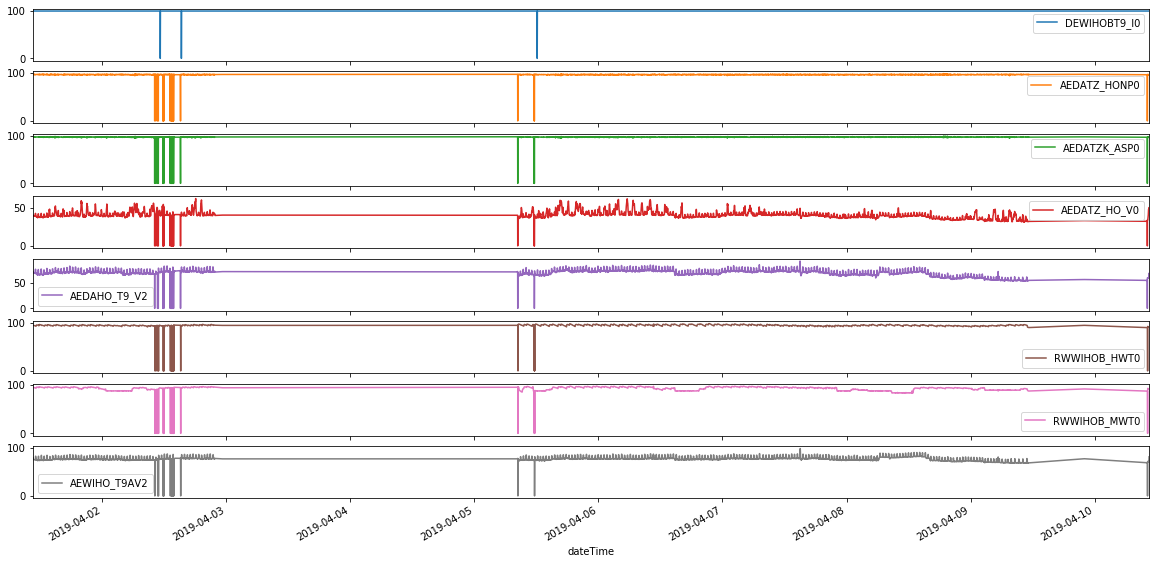

In [11]:
ax = multivariate_data.plot(subplots=True, layout=(size_column,1))
plt.rcParams['figure.figsize'] =(20,10)
# plt.savefig('E:/University of Bremen MSc/masters_thesis/forecasting_sensor_data_Salzgitter_AG/images_from_training/multivariate_data_regression.png')
plt.show()

In [82]:
zero_index=[]
zero_index=np.array(zero_index)
for index, value in multivariate_data.iterrows():
    for i , v in enumerate(value):
        if i == 0  and v == 0.0:
#             print('index: ',index)
            zero_index=np.append(zero_index,index)

print('size of zero_index: ',zero_index.size)

size of zero_index:  7


In [83]:
if zero_index.size > 0:
    multivariate_data_modify = multivariate_data.drop(zero_index,axis=0) # axis= 0 means row indiated. 1 means column indicated
else:
    multivariate_data_modify = multivariate_data

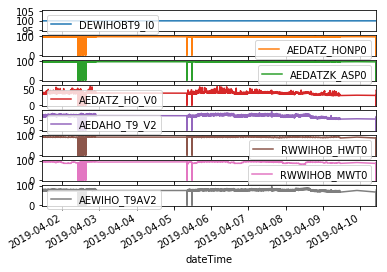

In [13]:
bx = multivariate_data_modify.plot(subplots=True, layout=(size_column,1))
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [84]:
from numpy import nan
multivariate_data_drop_zero= multivariate_data_modify.replace(0,nan)
multivariate_data_drop_zero=multivariate_data_drop_zero.dropna(how='any',axis=0)

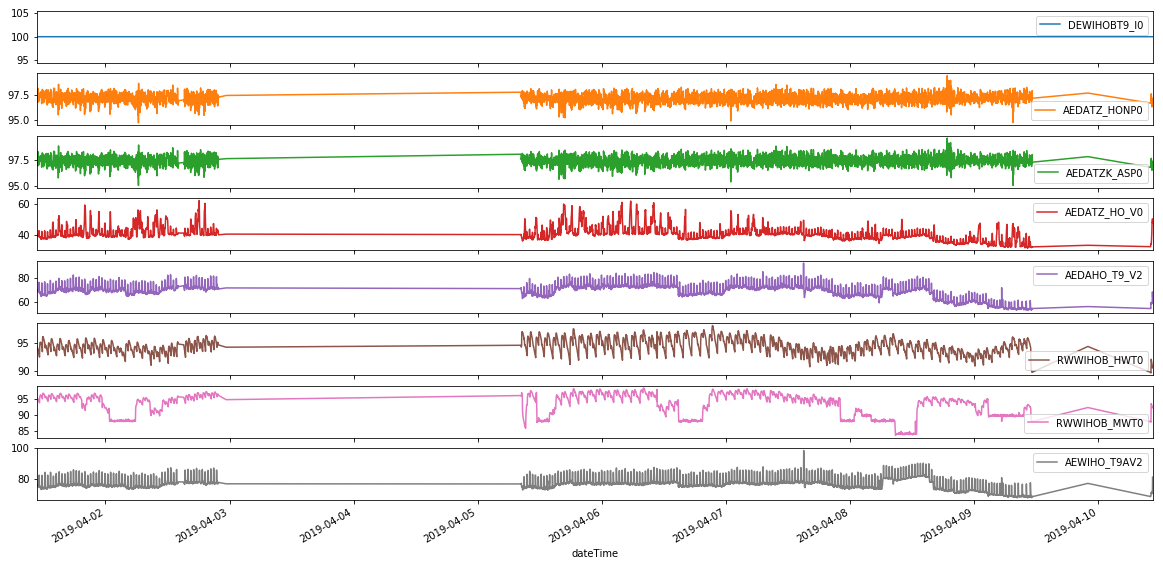

In [15]:
cx = multivariate_data_drop_zero.plot(subplots=True, layout=(size_column,1))
# plt.legend(loc='upper left')
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [85]:
multivariate_data_drop_zero_resample = multivariate_data_drop_zero.resample('1min').mean()

In [86]:
print(multivariate_data_drop_zero.shape)
print(multivariate_data_drop_zero_resample.shape)

(17841, 8)
(31281, 8)


In [87]:
multivariate_data_drop_zero_interpolate = multivariate_data_drop_zero_resample.interpolate('linear')

In [88]:
print(multivariate_data_drop_zero_interpolate.shape)

(31281, 8)


In [89]:
multivariate_data_drop_zero_interpolate.head()

,DEWIHOBT9_I0,AEDATZ_HONP0,AEDATZK_ASP0,AEDATZ_HO_V0,AEDAHO_T9_V2,RWWIHOB_HWT0,RWWIHOB_MWT0,AEWIHO_T9AV2
dateTime,,,,,,,,
2019-03-20 14:00:00,100.0,96.664227,97.056779,58.849192,80.655537,94.396188,95.335312,82.164653
2019-03-20 14:01:00,100.0,96.768799,97.171833,59.596989,81.089756,94.341811,95.239170,84.719391
2019-03-20 14:02:00,100.0,96.780630,97.152067,57.521160,80.335200,94.311420,95.184683,85.343840
2019-03-20 14:03:00,100.0,96.902255,97.253856,55.506700,75.924448,94.240242,95.167058,85.319617
2019-03-20 14:04:00,100.0,96.908991,97.255520,54.717202,73.998452,94.092291,95.045271,84.241223


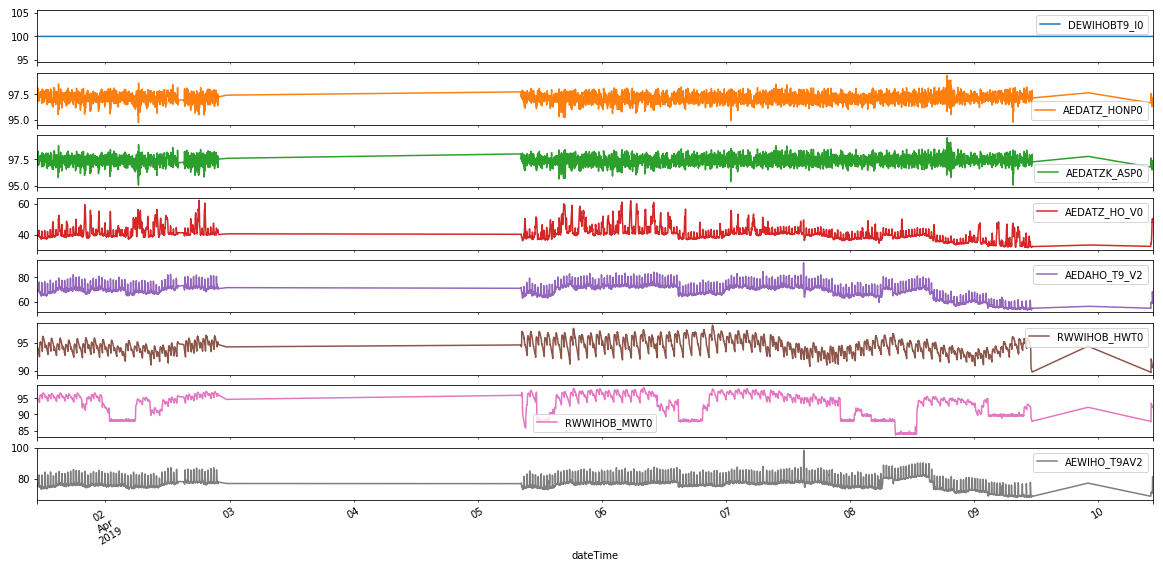

In [21]:
dx = multivariate_data_drop_zero_interpolate.plot(subplots=True, layout=(size_column,1))
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

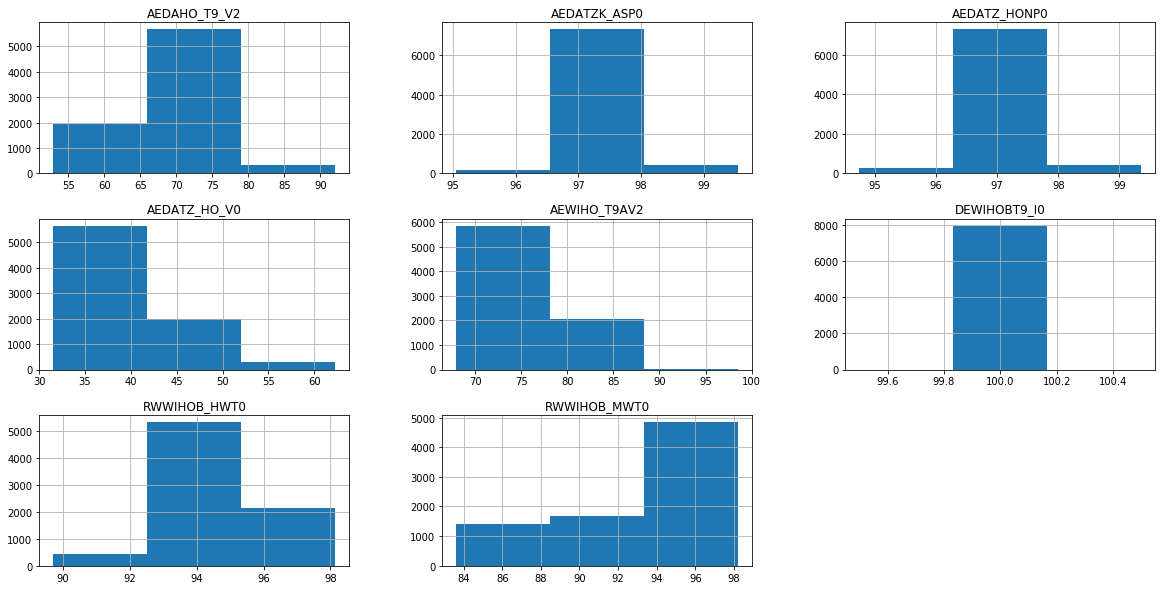

In [22]:
hist = multivariate_data_drop_zero.hist(bins=3)

In [90]:
# print(len(multivariate_column_label))
for idx, i in enumerate(multivariate_column_label):
    now_idx = idx+1
    
    if now_idx == len(multivariate_column_label):
        print('terminate')
        break
    print(multivariate_column_label[now_idx])
    drop_consecutive_same_value_zero = multivariate_data_drop_zero.loc[multivariate_data_drop_zero[multivariate_column_label[now_idx]].shift() != multivariate_data_drop_zero[multivariate_column_label[now_idx]]]
    drop_consecutive_same_value_interpolate = multivariate_data_drop_zero_interpolate.loc[multivariate_data_drop_zero_interpolate[multivariate_column_label[now_idx]].shift() != multivariate_data_drop_zero_interpolate[multivariate_column_label[now_idx]]]
    


AEDATZ_HONP0
AEDATZK_ASP0
AEDATZ_HO_V0
AEDAHO_T9_V2
RWWIHOB_HWT0
RWWIHOB_MWT0
AEWIHO_T9AV2
terminate


In [91]:
print(multivariate_data_drop_zero.shape)
print(drop_consecutive_same_value_zero.shape)
print(drop_consecutive_same_value_interpolate.shape)

(17841, 8)
(17825, 8)
(31265, 8)


In [92]:
new_dataframe = drop_consecutive_same_value_zero.drop(['DEWIHOBT9_I0'], axis=1)
# new_dataframe = drop_consecutive_same_value_interpolate.drop(['DEWIHOBT9_I0'], axis=1)

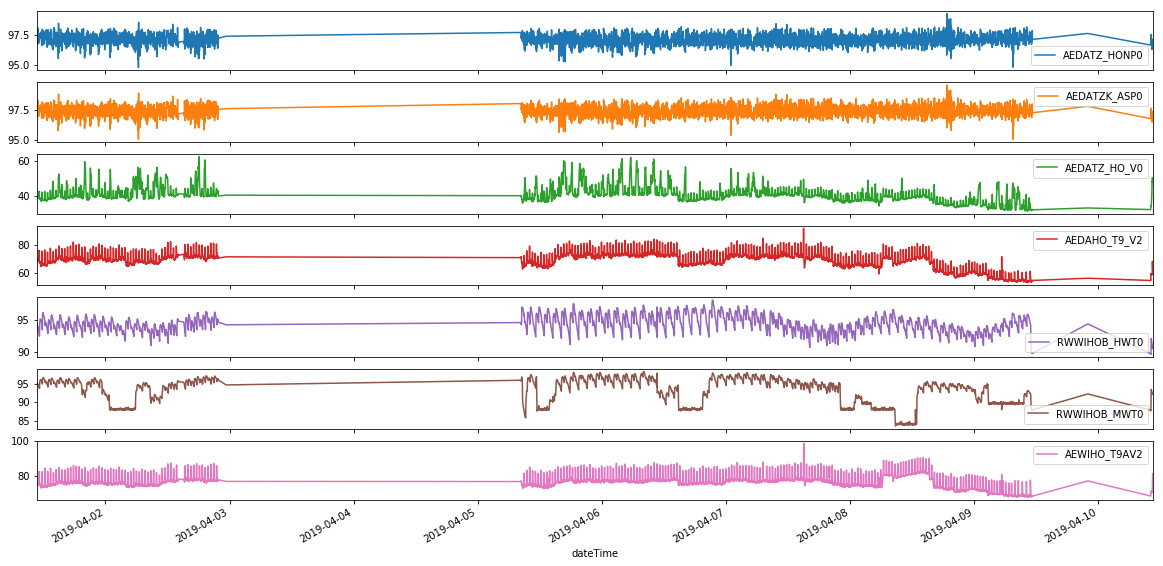

In [26]:
ex = new_dataframe.plot(subplots=True, layout=(size_column-1,1))
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [93]:
print('shape of multivariate_data: ',multivariate_data.shape)
print('shape of multivariate_data_modify: ', multivariate_data_modify.shape)
print('shape of multivariate_data_drop_zero: ',multivariate_data_drop_zero.shape)
print('shape of new_dataframe: ', new_dataframe.shape)

shape of multivariate_data:  (18000, 8)
shape of multivariate_data_modify:  (17993, 8)
shape of multivariate_data_drop_zero:  (17841, 8)
shape of new_dataframe:  (17825, 7)


In [148]:
new_dataframe.corr()

,AEDATZ_HONP0,AEDATZK_ASP0,AEDATZ_HO_V0,AEDAHO_T9_V2,RWWIHOB_HWT0,RWWIHOB_MWT0,AEWIHO_T9AV2
AEDATZ_HONP0,1.000000,0.987353,-0.344970,-0.130041,-0.025676,-0.033130,-0.020287
AEDATZK_ASP0,0.987353,1.000000,-0.272859,-0.081203,-0.031560,-0.030139,0.031361
AEDATZ_HO_V0,-0.344970,-0.272859,1.000000,0.562562,0.081423,0.217711,0.364508
AEDAHO_T9_V2,-0.130041,-0.081203,0.562562,1.000000,0.016299,0.290282,0.743277
RWWIHOB_HWT0,-0.025676,-0.031560,0.081423,0.016299,1.000000,0.281478,-0.113808
RWWIHOB_MWT0,-0.033130,-0.030139,0.217711,0.290282,0.281478,1.000000,0.120739
AEWIHO_T9AV2,-0.020287,0.031361,0.364508,0.743277,-0.113808,0.120739,1.000000


In [219]:
new_dataframe_1 = new_dataframe.drop(['AEDATZ_HONP0','AEDATZK_ASP0','RWWIHOB_HWT0','RWWIHOB_MWT0'], axis=1)

In [272]:
print(type(new_dataframe_1))
print(new_dataframe_1.columns)

<class 'pandas.core.frame.DataFrame'>
Index(['AEDATZ_HO_V0', 'AEDAHO_T9_V2', 'AEWIHO_T9AV2'], dtype='object')


[array([  20,  712, 2978, 7539, 3435, 1518,  924,  500,  150,   49],
      dtype=int64)
 array([28.15760435, 31.57169807, 34.98579179, 38.39988551, 41.81397922,
       45.22807294, 48.64216666, 52.05626038, 55.47035409, 58.88444781,
       62.29854153])]


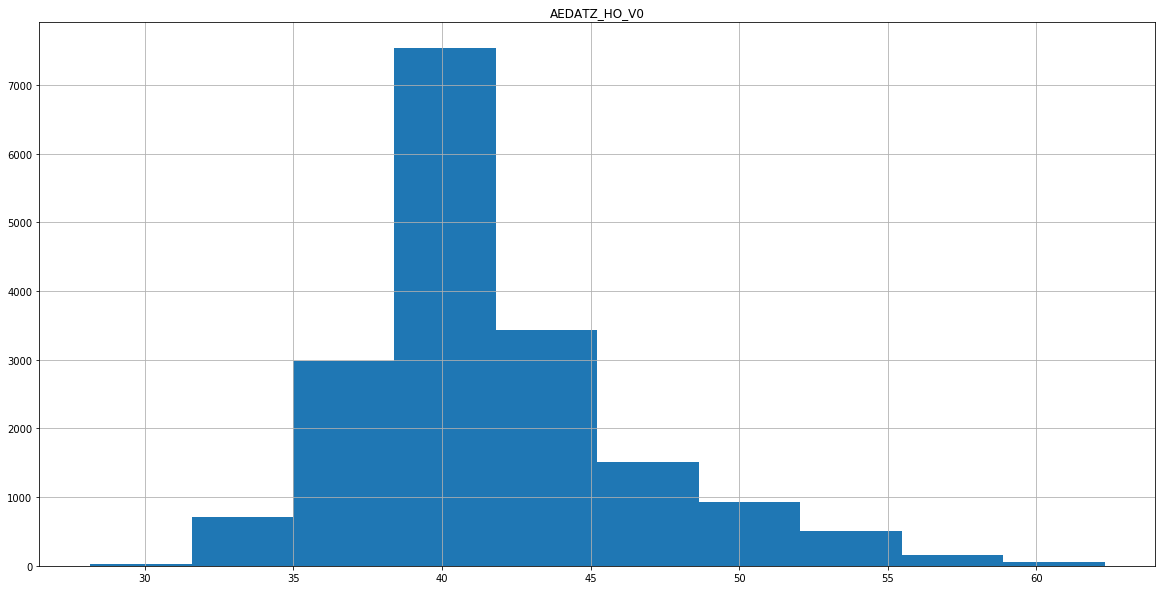

In [309]:
hist_1 = new_dataframe_1.hist(column='AEDATZ_HO_V0', bins=10)

hist_2 = np.histogram(new_dataframe_1['AEDATZ_HO_V0'])
# print(hist_2)

# for item in hist_2:
#     print("A tuple", item)

# for a,b in hist_2:
#     print(a,'\t',b)

hist_2 = np.array(hist_2)
print(hist_2)

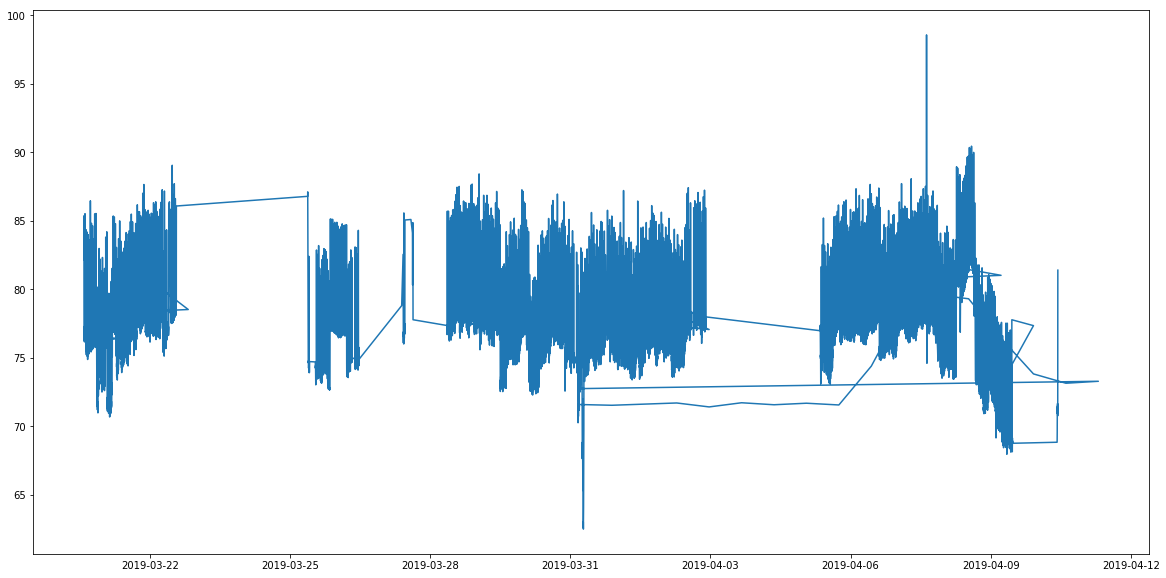

In [281]:
plt.plot(new_dataframe_1['AEWIHO_T9AV2'])

In [220]:
# print('multivariate_data_drop_zero head: \n',multivariate_data_drop_zero.head())
# dataset=np.array(multivariate_data_drop_zero)
dataset=np.array(new_dataframe_1)

In [316]:
# In this cell I am working on the target column to find out difference between every two consecutive row


target_column = dataset[:,-1]
print(target_column)
print(len(target_column))
print(target_column.shape)

store_array_target = []

for i in range(0,len(target_column)):
    if i < len(target_column)-1:
        subtraction_value = target_column[i]-target_column[i+1]
        store_array_target = np.append(store_array_target, subtraction_value)

print('length of store_array_target: ',len(store_array_target))
NumNonzeroElementsInRows    = (store_array_target != 0).sum()
print('non zero row number in store_array_target: ',NumNonzeroElementsInRows)

[82.16465333 84.71939097 85.34384044 ... 72.86208632 79.19781049
 81.38228262]
17825
(17825,)
length of store_array_target:  17824
non zero row number in store_array_target:  17824


17824
max:  12.118724046810115  and min:  -9.009060022650047


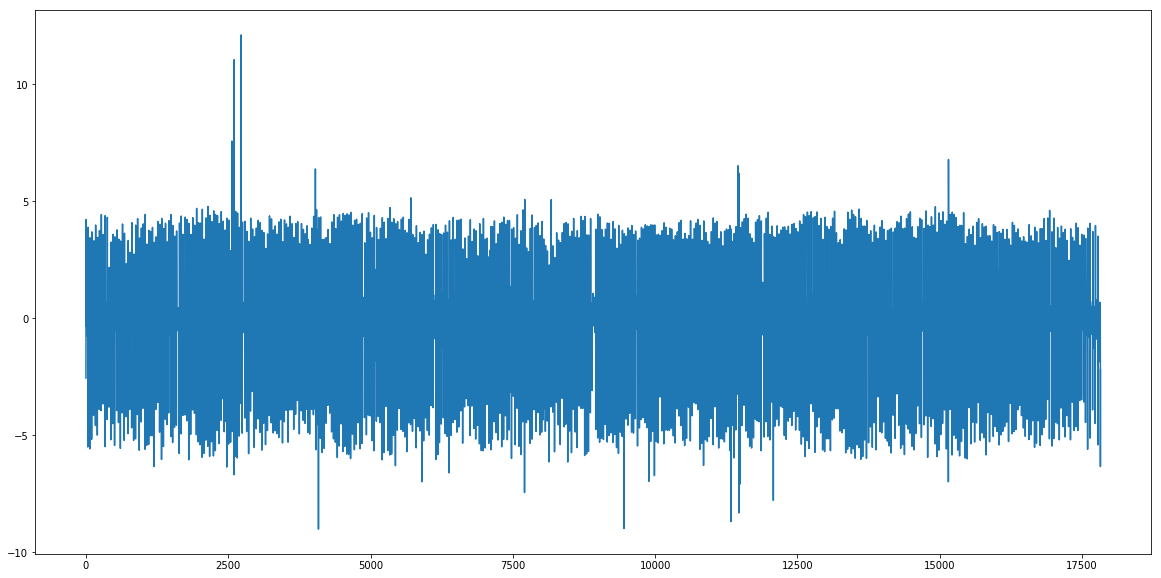

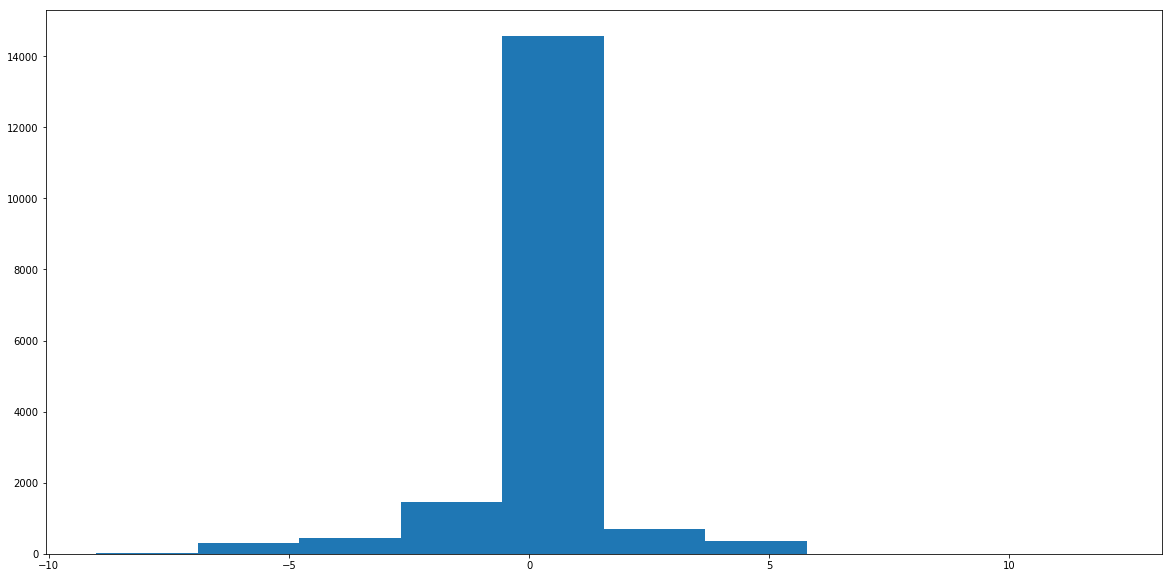

In [311]:
print('max: ',max(store_array_target),' and min: ',min(store_array_target))
plt.plot(store_array_target)
plt.show()
plt.hist(store_array_target)
plt.show()

In [221]:
# observing correlation between feature and target

import seaborn as sns
plt.figure(figsize=(20,10))
# cor = multivariate_data_mean.corr()
# cor = multivariate_data_drop_zero.corr()
cor = new_dataframe_1.corr()
cor
# sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
# plt.show()

,AEDATZ_HO_V0,AEDAHO_T9_V2,AEWIHO_T9AV2
AEDATZ_HO_V0,1.000000,0.562562,0.364508
AEDAHO_T9_V2,0.562562,1.000000,0.743277
AEWIHO_T9AV2,0.364508,0.743277,1.000000


<Figure size 1440x720 with 0 Axes>

In [222]:
# # dataset=np.array(multivariate_data_mean)
# dataset=np.array(multivariate_data_drop_zero)

# NumberOfElements=int(len(dataset)*0.9)
# print('dataset length: ',len(dataset))
# print('Number of Elements for training: ',NumberOfElements)

# multiple_ip_train_data=dataset[0:NumberOfElements]
# print(multiple_ip_train_data.shape)
# multiple_ip_test_set=dataset[NumberOfElements:len(dataset)]
# print(multiple_ip_test_set.shape)


def make_dataset(PandaDataframe):
    dataset = np.array(PandaDataframe)

    NumberOfElements = int(len(dataset)*0.972)
    print('dataset length: ',len(dataset))
    print('Number of Elements for training: ',NumberOfElements)

    multiple_ip_train_data = dataset[0:NumberOfElements]
    multiple_ip_test_set = dataset[NumberOfElements:len(dataset)]
    
    return multiple_ip_train_data, multiple_ip_test_set

multiple_ip_train_data, multiple_ip_test_set = make_dataset(new_dataframe_1)

print('train_data_conv shape: ', multiple_ip_train_data.shape)
print('test_data_conv shape: ', multiple_ip_test_set.shape)

dataset length:  17825
Number of Elements for training:  17325
train_data_conv shape:  (17325, 3)
test_data_conv shape:  (500, 3)


In [33]:
# # remove this line if you want do not want to count mean. Just comment it and uncomment the below lines.
# multi_mean=multivariate_data.mean()
# multivariate_data_mean= multivariate_data.replace(0,multi_mean)

In [34]:
# multivariate_data_mean.plot()
# plt.show()

# Do normalization

In [38]:
# from sklearn import preprocessing

# min_max_scaler = preprocessing.MinMaxScaler()
# np_scaled = min_max_scaler.fit_transform(multivariate_data_mean)
# col_label=['AEDATZ_HO_V0','AEWIHO_T9AV2','AEWIHOAVABV2','RWWIHOA_HWT0','AEWIHOAKZ_V0','RWWIHOA_MWT0','AEDAHO_T9_V2']
# df_normalized = pd.DataFrame(np_scaled,index=multivariate_data.index,columns=col_label)

# function to make train and test dataset usable for conv LSTM

In [39]:
# print('multiple_ip_train_data: \n',multiple_ip_train_data[0:8])
# print('multiple ip train data shape: ',multiple_ip_train_data.shape,'\tsize: ',multiple_ip_train_data.size,'\tdimesnion: ',multiple_ip_train_data.ndim)

### Understanding function

In [5]:
# split a multivariate sequence into samples
from numpy import array
def split_sequence(sequence, n_steps):
    print('length of sequence',len(sequence))
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        print('end_ix: ',end_ix)
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix,:-1], sequence[end_ix,-1]
        print('seq_x: \n',seq_x,'\nseq_y: \n',seq_y)
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

a=array([[1,2,3,4,5,6,7],[8,9,10,11,12,13,14],[1,20,30,40,50,60,70],[1,-20,-50,42,85,65,-75]])
print('printing array a: \n',a)
print(' array a shape:',a.shape,'\tsize: ',a.size,'\tdimension: ',a.ndim )
step=2
train_a,train_b=split_sequence(a,step)
print('printing array train_a: \n',train_a)
print(print(' array train_a shape:',train_a.shape,'\tsize: ',train_a.size,'\tdimension: ',train_a.ndim ))
print('printing array train_b: \n',train_b)
print(print(' array train_b shape:',train_b.shape,'\tsize: ',train_b.size,'\tdimension: ',train_b.ndim ))

printing array a: 
 [[  1   2   3   4   5   6   7]
 [  8   9  10  11  12  13  14]
 [  1  20  30  40  50  60  70]
 [  1 -20 -50  42  85  65 -75]]
 array a shape: (4, 7) 	size:  28 	dimension:  2
length of sequence 4
end_ix:  2
seq_x: 
 [[ 1  2  3  4  5  6]
 [ 8  9 10 11 12 13]] 
seq_y: 
 70
end_ix:  3
seq_x: 
 [[ 8  9 10 11 12 13]
 [ 1 20 30 40 50 60]] 
seq_y: 
 -75
end_ix:  4
printing array train_a: 
 [[[ 1  2  3  4  5  6]
  [ 8  9 10 11 12 13]]

 [[ 8  9 10 11 12 13]
  [ 1 20 30 40 50 60]]]
 array train_a shape: (2, 2, 6) 	size:  24 	dimension:  3
None
printing array train_b: 
 [ 70 -75]
 array train_b shape: (2,) 	size:  2 	dimension:  1
None


In [23]:
# n_features_a=train_a.shape[-1]
# n_seq_a=1
# n_row_a=1
# n_steps_a=1
# train_a_reshape = train_a.reshape((train_a.shape[0], n_seq_a, n_row_a, n_steps_a, n_features_a))

# print('printing array train_a_reshape: \n',train_a_reshape)
# print(print(' array train_a_reshape shape:',train_a_reshape.shape,'\tsize: ',train_a_reshape.size,'\tdimension: ',train_a_reshape.ndim ))

In [240]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
from keras.layers import Flatten
from keras.layers import ConvLSTM2D
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
from keras import callbacks

In [34]:
# import tensorflow as tf
# import sys
# print(sys.path)

In [223]:
 # split a multivariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix,:-1], sequence[end_ix,-1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)
 
# define input sequence
# raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps_1 = 2
# split into samples
X_Conv_Lstm, y_Conv_Lstm = split_sequence(multiple_ip_train_data, n_steps_1)

print('X_Conv_Lstm shape: ',X_Conv_Lstm.shape,'\tX_Conv_Lstm size: ',X_Conv_Lstm.size,'\tX_Conv_Lstm dimension: ',X_Conv_Lstm.ndim)
print('y_Conv_Lstm shape: ', y_Conv_Lstm.shape,' size: ',y_Conv_Lstm.size,' dim: ',y_Conv_Lstm.ndim)

X_Conv_Lstm shape:  (17323, 2, 2) 	X_Conv_Lstm size:  69292 	X_Conv_Lstm dimension:  3
y_Conv_Lstm shape:  (17323,)  size:  17323  dim:  1


In [224]:
# reshape from [samples, timesteps] into [samples, timesteps, rows, columns, features]

samples = X_Conv_Lstm.shape[0]
time = n_steps_1
rows = 1
n_features = X_Conv_Lstm.shape[-1]
cols = n_features
channels = 1

# X_Conv_Lstm_train = X_Conv_Lstm.reshape((X_Conv_Lstm.shape[0], n_seq, n_rows, n_steps_2, n_features))
X_Conv_Lstm_train = X_Conv_Lstm.reshape((samples, time, rows, cols, channels)) #last 2 is feature

In [225]:
print('X_Conv_Lstm shape: ',X_Conv_Lstm.shape,'\tX_Conv_Lstm size: ',X_Conv_Lstm.size,'\tX_Conv_Lstm dimension: ',X_Conv_Lstm.ndim)
print('X_Conv_Lstm_train shape: ',X_Conv_Lstm_train.shape,'\tX_Conv_Lstm_train size: ',X_Conv_Lstm_train.size,'\tX_Conv_Lstm_train dimension: ',X_Conv_Lstm_train.ndim)

X_Conv_Lstm shape:  (17323, 2, 2) 	X_Conv_Lstm size:  69292 	X_Conv_Lstm dimension:  3
X_Conv_Lstm_train shape:  (17323, 2, 1, 2, 1) 	X_Conv_Lstm_train size:  69292 	X_Conv_Lstm_train dimension:  5


In [259]:
# define model

# cbks = [callbacks.LearningRateScheduler(lambda x: 1. / (1. + x))]

lr = 0.01

def lr_schedule(epoch):
    print('epoch value: ', epoch)
    lr_1 = lr * (0.1 ** int(epoch / 10))
    print('now lr_1: ', lr_1)
    return lr_1

batch_size=32
epochs= 30
activation_function = 'relu'

In [260]:
model = Sequential()
# n_seq, 1, n_steps_2, n_features
model.add(ConvLSTM2D(filters=64,data_format='channels_last', kernel_size=(1,2), activation=str(activation_function), input_shape=(time,rows,cols,channels),return_sequences=False))
# model.add(ConvLSTM2D(filters=64,data_format='channels_last', kernel_size=(1,2), activation=str(activation_function)))
model.add(Flatten())
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

In [261]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_19 (ConvLSTM2D) (None, 1, 1, 64)          33536     
_________________________________________________________________
flatten_18 (Flatten)         (None, 64)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 65        
Total params: 33,601
Trainable params: 33,601
Non-trainable params: 0
_________________________________________________________________
None


In [262]:
import keras
keras.__version__

'2.2.3'

In [263]:
train_model=model.fit(X_Conv_Lstm_train, y_Conv_Lstm, batch_size=batch_size, epochs=epochs, verbose=1,
                      shuffle=True, callbacks=[LearningRateScheduler(lr_schedule)])
#                      ModelCheckpoint('E:/CONV_LSTM_30.h5', save_best_only=True)])

Epoch 1/30
epoch value:  0
now lr_1:  0.01
17323/17323 [==============================] - 5s 305us/step - loss: 78.3367 - acc: 0.0000e+00
Epoch 2/30
epoch value:  1
now lr_1:  0.01
17323/17323 [==============================] - 3s 147us/step - loss: 9.9979 - acc: 0.0000e+00
Epoch 3/30
epoch value:  2
now lr_1:  0.01
17323/17323 [==============================] - 3s 148us/step - loss: 9.6517 - acc: 0.0000e+00
Epoch 4/30
epoch value:  3
now lr_1:  0.01
17323/17323 [==============================] - 3s 151us/step - loss: 8.6574 - acc: 0.0000e+00
Epoch 5/30
epoch value:  4
now lr_1:  0.01
17323/17323 [==============================] - 3s 149us/step - loss: 7.8557 - acc: 0.0000e+00
Epoch 6/30
epoch value:  5
now lr_1:  0.01
17323/17323 [==============================] - 3s 152us/step - loss: 6.2029 - acc: 0.0000e+00
Epoch 7/30
epoch value:  6
now lr_1:  0.01
17323/17323 [==============================] - 3s 150us/step - loss: 4.9223 - acc: 0.0000e+00
Epoch 8/30
epoch value:  7
now lr_1:  0.

dict_keys(['loss', 'acc', 'lr'])


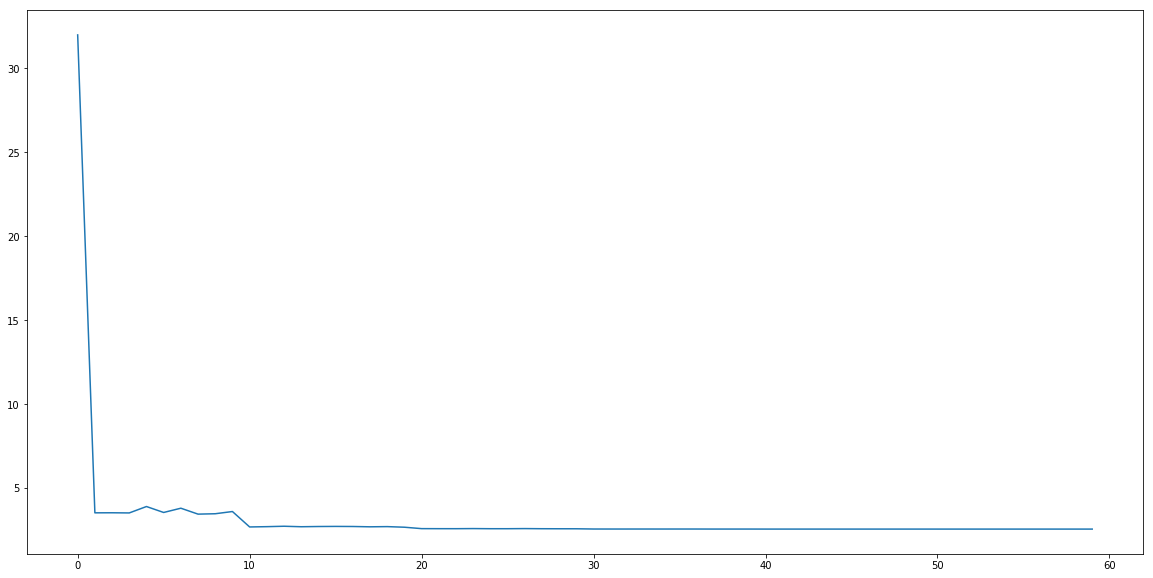

In [127]:
print(train_model.history.keys())

# plt.subplot(2,1,1)
plt.plot(train_model.history['loss'])

# plt.subplot(2,1,2)
# plt.plot(train_model.history['val_loss'])

plt.savefig('loss_curve_only_loss.png')

plt.show()

In [264]:
X_Conv_Lstm_test, y_Conv_Lstm_test = split_sequence(multiple_ip_test_set, n_steps_1)
print('X_Conv_Lstm_test shape: ', X_Conv_Lstm_test.shape,'\t X_Conv_Lstm_test dimension: ', X_Conv_Lstm_test.ndim)

test_sample = X_Conv_Lstm_test.shape[0]
# x_input = X_Conv_Lstm_test.reshape((X_Conv_Lstm_test.shape[0], n_seq, 1, n_steps_2, X_Conv_Lstm_test.shape[2]))
x_input = X_Conv_Lstm_test.reshape((test_sample, time, rows, cols, channels))

X_Conv_Lstm_test shape:  (498, 2, 2) 	 X_Conv_Lstm_test dimension:  3


In [265]:
from keras.models import load_model

# load_trained_model=load_model('/media/atif/BE0E05910E0543BD/University of Bremen MSc/masters_thesis/forecasting_sensor_data_Salzgitter_AG/trained_model_file/conv_LSTM_norm_100.h5')

yhat = model.predict(x_input, verbose=1)
# print(yhat)

498/498 [==============================] - 1s 1ms/step


In [266]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [267]:
#Print MSE to see how good the model is
Error = mean_squared_error(y_Conv_Lstm_test,yhat)
print('mean squared error: ',Error)
print('RMSE Error: ',sqrt(Error))

mean squared error:  1.9632715396283293
RMSE Error:  1.4011679198541227


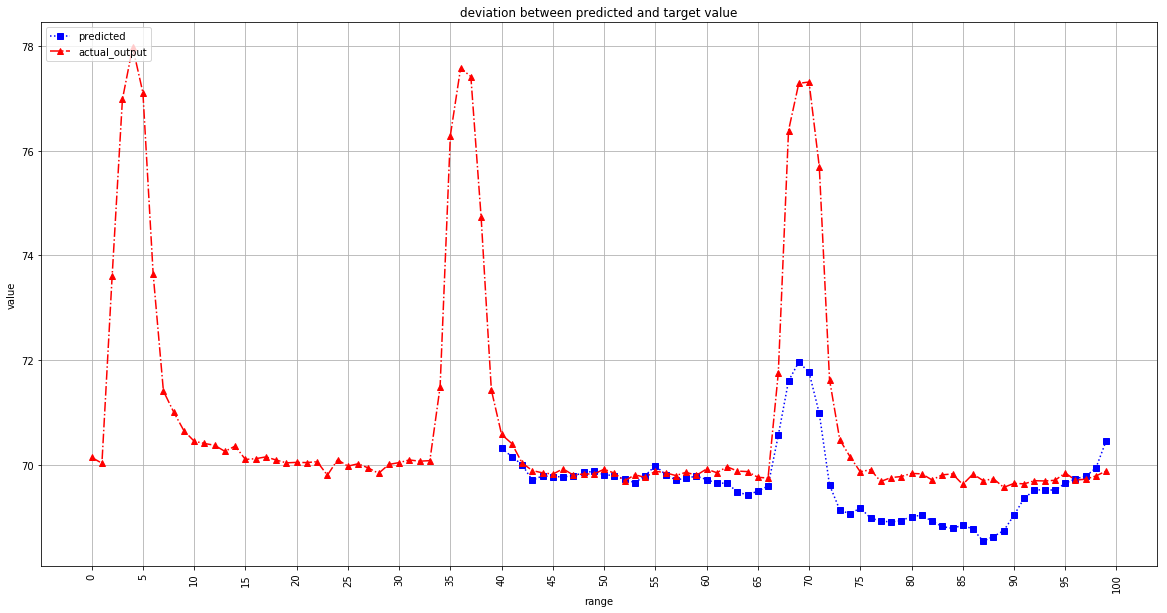

In [268]:
# general plot. for better go to the next cell

x_data = range(100)
plt.plot(x_data[40:],yhat[40:100],color='blue',marker='s', linestyle=':')
plt.plot(x_data[:],y_Conv_Lstm_test[0:100],color='red',marker='^', linestyle='-.')
# plt.plot(yhat[51:99],color='black',marker='s', linestyle=':')
plt.title('deviation between predicted and target value')
plt.ylabel('value')
plt.xlabel('range')
plt.legend(['predicted','actual_output'], loc='upper left')
plt.grid(b=None, which='both', axis='both')
plt.xticks(np.arange(0,105,5))
plt.xticks( rotation=90)
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

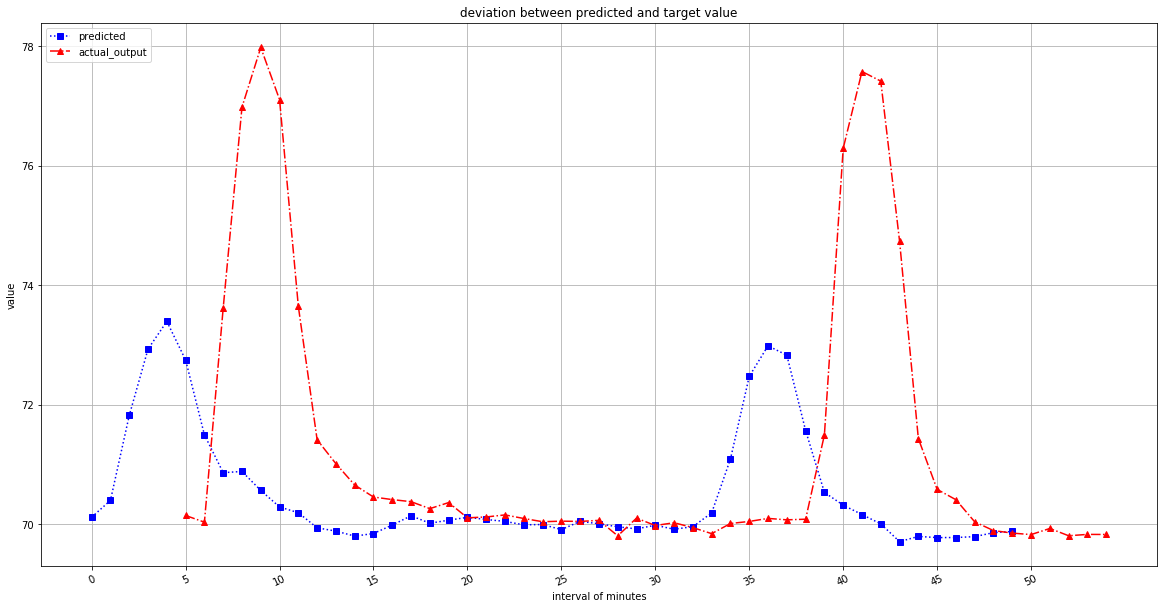

In [269]:
# shifting actual graph 5 unit in the direction of right to observe the trend of predicted curve

actual_data = range(55)


plt.plot(yhat[0:50],color='blue',marker='s', linestyle=':')
plt.plot(actual_data[5:],y_Conv_Lstm_test[0:50],color='red',marker='^', linestyle='-.')
# plt.plot(yhat[51:99],color='black',marker='s', linestyle=':')
plt.title('deviation between predicted and target value')
plt.ylabel('value')
plt.xlabel('interval of minutes')
plt.legend(['predicted','actual_output'], loc='upper left')
plt.grid(b=None, which='both', axis='both')
plt.xticks(np.arange(0,55,5))
plt.xticks( rotation=25)
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [175]:
y_Conv_Lstm_test_reshaped = np.reshape(y_Conv_Lstm_test, (-1, 1))

In [176]:
print(y_Conv_Lstm_test_reshaped.shape)

(498, 1)


<class 'numpy.ndarray'>


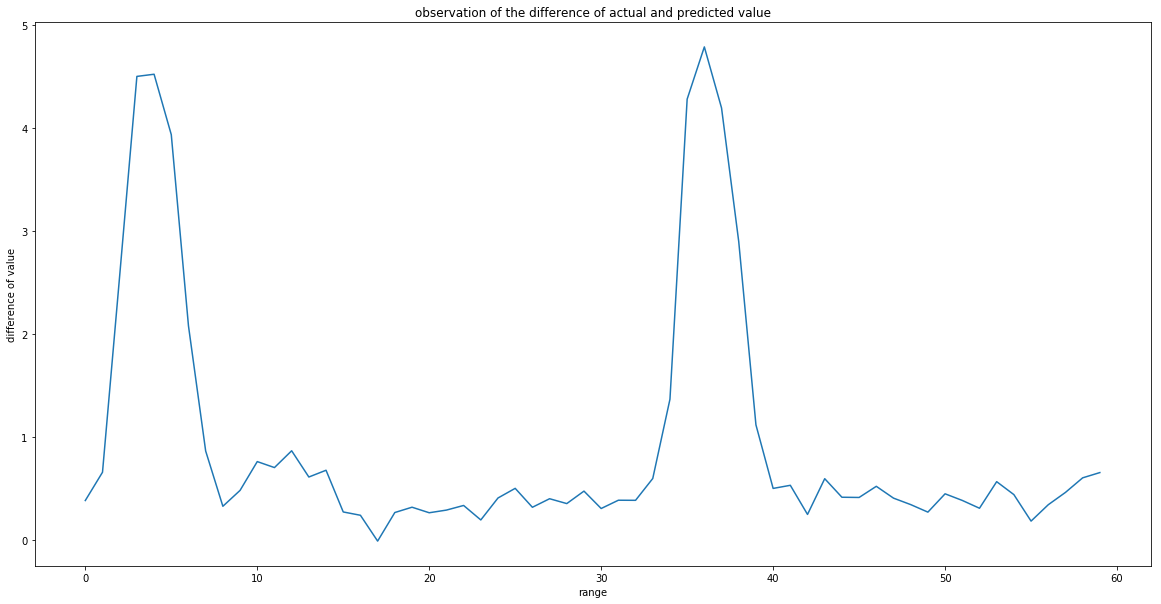

In [177]:
# try to draw a graph where I will plot only the differences between actual and predicted value.
# %matplotlib qt

difference_of_value = y_Conv_Lstm_test_reshaped - yhat
print(type(difference_of_value))

plt.plot(difference_of_value[0:60])
plt.title('observation of the difference of actual and predicted value')

# plt.rcParams['xtick.labelsize']=2
# plt.rcParams['ytick.labelsize']=2
# plt.tick_params(labelsize=20)
plt.ylabel('difference of value')
plt.xlabel('range')
# plt.savefig('difference_of_actual_and_predicted_value.png')
plt.show()

In [178]:
# plt.hist(difference_of_value, bins=20)
# # plt.xlim(-10,10,1)
# plt.show()

def count_each_number(difference_array):
    count_greater_6 = 0
    count_5_to_6 = 0
    count_4_to_5 = 0
    count_3_to_4 = 0
    count_2_to_3 = 0
    count_1_to_2 = 0
    count_less_1 = 0

    for i in difference_of_value:
        if i >= 6:
            count_greater_6 +=1
        if 5<=i<6:
            count_5_to_6 +=1
        if 4<=i<5:
            count_4_to_5 +=1
        if 3<=i<4:
            count_3_to_4 +=1
        if 2<=i<3:
            count_2_to_3 +=1
        if 1<=i<2:
            count_1_to_2 +=1
        if i<1:
            count_less_1 +=1
    print(count_greater_6)
    print(count_5_to_6)
    print(count_4_to_5)
    print(count_3_to_4)
    print(count_2_to_3)
    print(count_1_to_2)
    print(count_less_1)
    
count_each_number(difference_of_value)

0
10
20
12
13
26
417


min of yhat:  [67.7412]  ,max of yhat:  [75.645996]
min of y_Conv_Lstm_test:  67.94608028186737  ,max of y_Conv_Lstm_test:  81.38228262237322


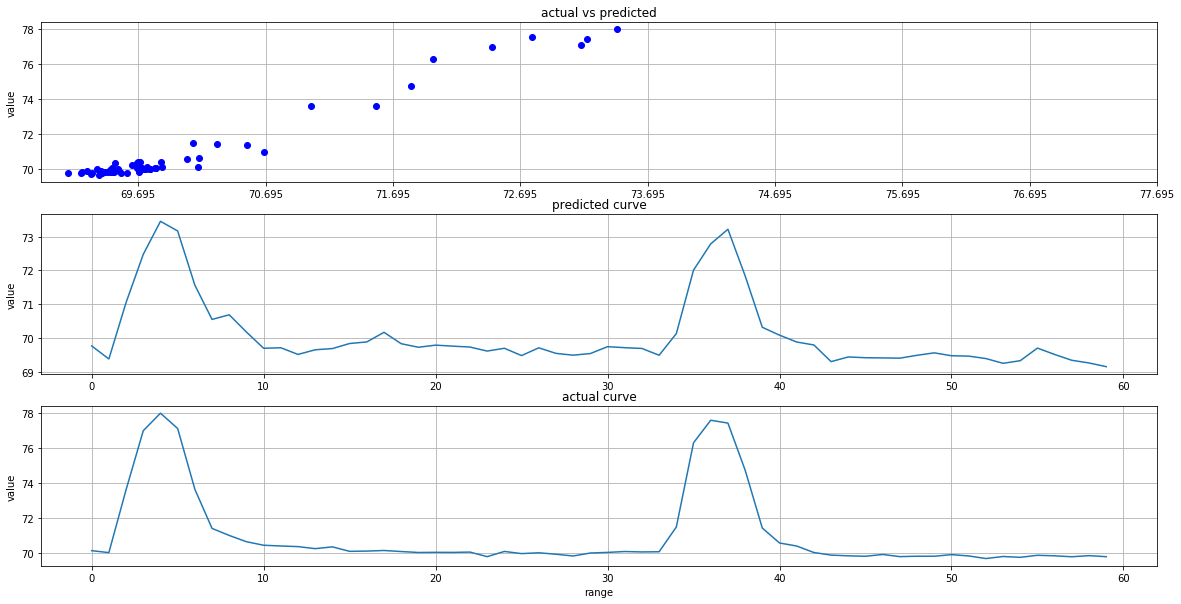

In [179]:
# graph predicted vs actual value
# %matplotlib qt
print('min of yhat: ', min(yhat),' ,max of yhat: ', max(yhat))
print('min of y_Conv_Lstm_test: ', min(y_Conv_Lstm_test),' ,max of y_Conv_Lstm_test: ', max(y_Conv_Lstm_test))

plt.subplot(3,1,1)
plt.plot(yhat[0:60], y_Conv_Lstm_test[0:60], 'bo')
plt.ylabel('value')
plt.xticks(np.arange(min(y_Conv_Lstm_test[0:60]),max(y_Conv_Lstm_test[0:60]),1))
# plt.yticks(np.arange(min(yhat[0:60]),max(yhat[0:60]),1))
plt.grid(b=None, which='both', axis='both')
plt.title('actual vs predicted')
# plt.xlim(min(y_conv_LSTM_test), max(y_conv_LSTM_test))
# plt.ylim(min(yhat), max(yhat))
# plt.tick_params(labelsize=10)

plt.subplot(3,1,2)
plt.plot(yhat[0:60])
plt.ylabel('value')
plt.grid(b=None, which='both', axis='both')
plt.title('predicted curve')
# plt.tick_params(labelsize=10)

plt.subplot(3,1,3)
plt.plot(y_Conv_Lstm_test[0:60])
plt.ylabel('value')
plt.xlabel('range')
plt.grid(b=None, which='both', axis='both')
plt.title('actual curve')
# plt.tick_params(labelsize=10)

# plt.savefig('predicted_vs_actual_curve.png')
plt.show()

min : 67.94608028186737  and max:  81.38228262237322
min : [67.7412]  and max:  [75.645996]


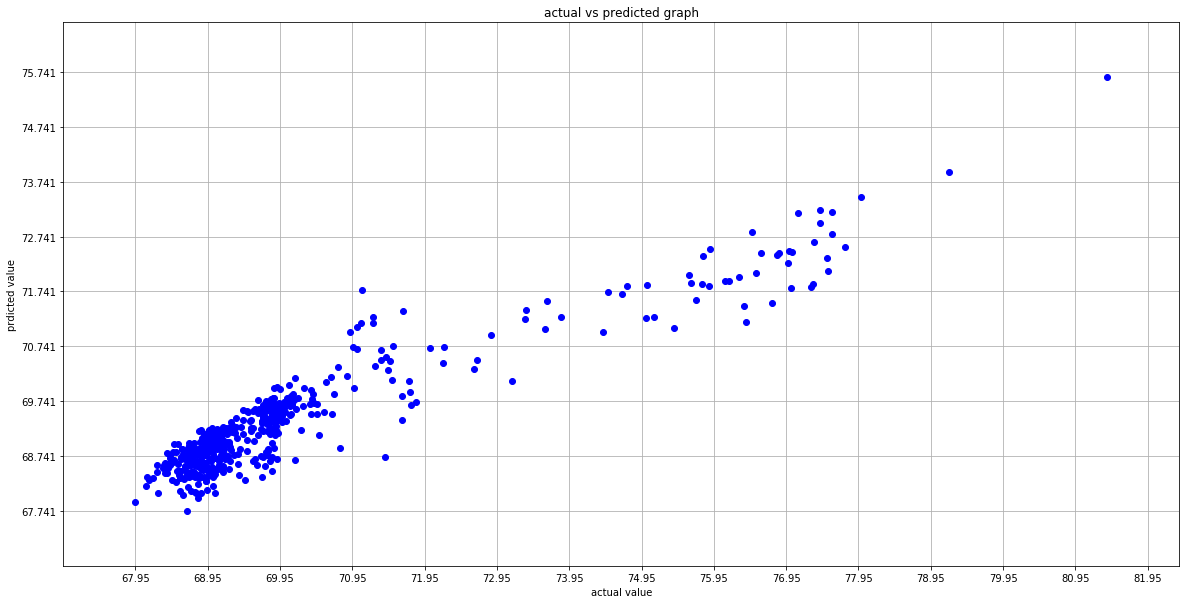

In [180]:
predicted_output = yhat
test_output = y_Conv_Lstm_test

low = 0
high = len(predicted_output)

print('min :', min(test_output[low:high]),' and max: ',max(test_output[low:high]))
print('min :', min(predicted_output[low:high]),' and max: ',max(predicted_output[low:high]))
plt.plot(test_output[low:high], predicted_output[low:high], 'bo')
plt.xticks(np.arange(min(test_output[low:high]),max(test_output[low:high])+1,1))
plt.yticks(np.arange(min(predicted_output[low:high]),max(predicted_output[low:high])+1,1))
plt.xlim(min(test_output[low:high]-1), max(test_output[low:high])+1)
plt.ylim(min(predicted_output[low:high]-1), max(predicted_output[low:high])+1)
plt.ylabel('prdicted value')
plt.xlabel('actual value')
plt.grid(b=None, which='both', axis='both')
plt.title('actual vs predicted graph')

plt.show()

In [24]:
# count=0
# for i,j in multivariate_data.iterrows():
#     for o in j:
#         if o==0:
#             print(count,'\t',i,'\t',o)
#             count+=1
    

In [25]:
# multivariate_data_mean.max()

In [26]:
# df_normalized.head()

In [27]:
# head=multivariate_data_mean.head()
# print(head)

In [28]:
# # To get max value from each column
# temp=0
# max_lst=[]
# for idx,val in enumerate(col_label):
#     values=multivariate_data_mean[val]
#     for item in values:
#         if item>temp:
#             temp=item
#         else:
#             pass
#     s=[val,temp]
#     max_lst.append(s)
#     temp=0
# print(temp)

In [29]:
# max_lst[0][1]

# finding max value

In [38]:
# finding max value from each column
max_array=[]
i=0
for idx,val in enumerate(list(multivariate_data_mean.columns)):
    x=multivariate_data_mean[val].max()
    q=[val,x]
    max_array.append(q)

In [39]:
print(max_array)

[['AEDATZ_HO_V0', 67.61101867732815], ['AEWIHO_T9AV2', 99.03705800931169], ['AEWIHOAVABV2', 96.347427549395], ['RWWIHOA_HWT0', 99.30801700284124], ['AEWIHOAKZ_V0', 92.0322826114535], ['RWWIHOA_MWT0', 99.51592757474876], ['AEDAHO_T9_V2', 99.4516393320581]]


In [43]:
target_column_max_value=max_array[-1][-1]

In [44]:
target_column_max_value

99.4516393320581

# Unnormalized predicted and actual output array

In [46]:
unnormalized_yhat=yhat*target_column_max_value
unnormalized_y_Conv_Lstm_test=y_Conv_Lstm_test*target_column_max_value

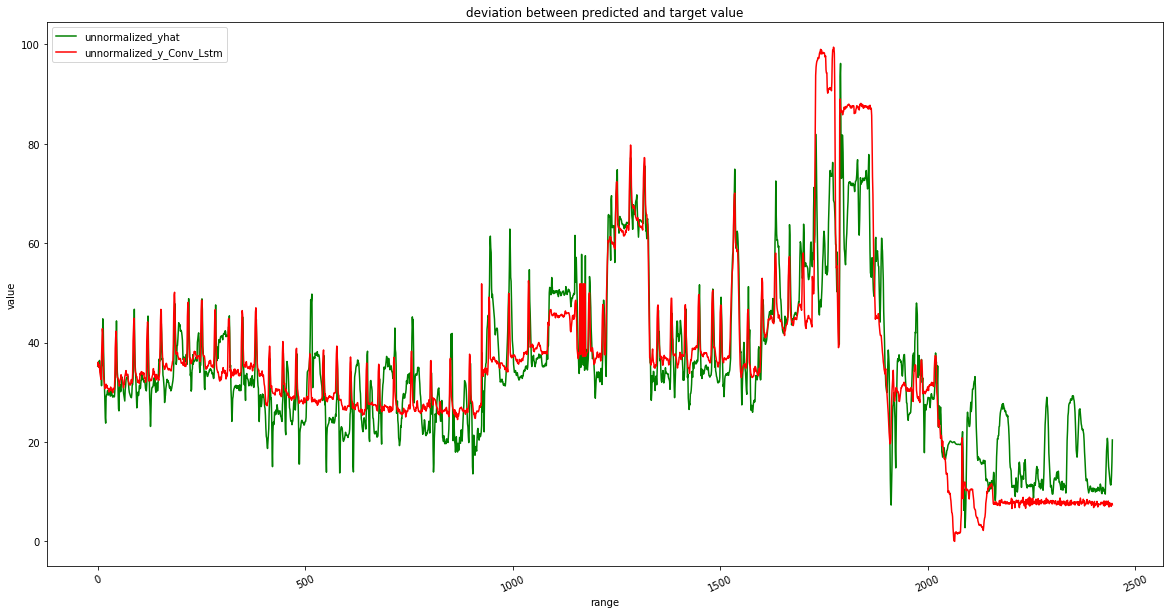

In [47]:
plt.plot(unnormalized_yhat,color='green')
plt.plot(unnormalized_y_Conv_Lstm_test,color='red')
plt.xticks( rotation=25)
plt.title('deviation between predicted and target value')
plt.ylabel('value')
plt.xlabel('range')
plt.legend(['unnormalized_yhat', 'unnormalized_y_Conv_Lstm'], loc='upper left')
plt.show()

In [48]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#Print MSE to see how good the model is
Error = mean_squared_error(unnormalized_y_Conv_Lstm_test,unnormalized_yhat)
print('mean squared error: ',Error)
print('RMSE Error: ',sqrt(Error))

mean squared error:  84.43641866138238
RMSE Error:  9.188929135725358


In [201]:
test_new.head()

,row ID,longTime,AEAGHOAWE2T1,AEAGHOAWE2A0,AEAGHOAWE2T0,AEAGHOAWE1A0,AEAGHOAWE1T1,AEAGHOAWE1T0,AEAGHOAWE3T0,AEAGHOAWE3A0,...,RWWIHOT9_RV0,RWWIHOT10RV0,RWWIHOTSURV0,RWWIHOTSUMV0,RWWIHO_VERV0,RWWIHO_UESV0,RWWIHOSUMAV0,stringTime,correct_longtime,dateTime
0,Row0,1555311120000,74.451979,19.111606,98.371549,18.819155,93.337524,69.969526,95.445534,7.802471,...,22.338103,75.685755,73.945394,0.000000,0.000000,0.000000,0.000000,2019-04-15 08:52,1555311120,2019-04-15 08:52:00
1,Row1,1555311060000,73.933103,18.088026,98.186038,18.943335,92.869960,69.969526,95.445534,12.856953,...,26.967692,75.685755,66.649583,56.385432,68.734584,9.127668,2.275890,2019-04-15 08:51,1555311060,2019-04-15 08:51:00
2,Row2,1555311000000,73.471742,25.843589,98.371549,33.166077,92.343799,69.969526,95.628479,21.591973,...,26.851837,75.685755,66.587330,56.402658,68.853203,9.136596,2.275735,2019-04-15 08:50,1555311000,2019-04-15 08:50:00
3,Row3,1555310940000,73.010381,27.772137,98.371549,35.991205,91.876236,69.850105,95.607810,19.492370,...,26.266369,75.685755,66.373907,56.527297,69.391059,9.138625,2.281882,2019-04-15 08:49,1555310940,2019-04-15 08:49:00
4,Row4,1555310880000,72.549020,18.402556,98.186038,19.591687,91.408672,69.969526,95.607810,8.014898,...,26.605640,75.685755,66.529224,56.640964,69.299560,9.121256,2.269317,2019-04-15 08:48,1555310880,2019-04-15 08:48:00


In [202]:
df = test.drop(test.columns[[0]], axis=1)

In [203]:
df.head()

,longTime,AEAGHOAWE2T1,AEAGHOAWE2A0,AEAGHOAWE2T0,AEAGHOAWE1A0,AEAGHOAWE1T1,AEAGHOAWE1T0,AEAGHOAWE3T0,AEAGHOAWE3A0,AEAGHOAWE3T1,...,RWWIHOUT10V1,RWWIHOT7_RV0,RWWIHOT8_RV0,RWWIHOT9_RV0,RWWIHOT10RV0,RWWIHOTSURV0,RWWIHOTSUMV0,RWWIHO_VERV0,RWWIHO_UESV0,RWWIHOSUMAV0
0,1555311120000,74.451979,19.111606,98.371549,18.819155,93.337524,69.969526,95.445534,7.802471,57.766387,...,0.0,92.632593,44.620461,22.338103,75.685755,73.945394,0.000000,0.000000,0.000000,0.000000
1,1555311060000,73.933103,18.088026,98.186038,18.943335,92.869960,69.969526,95.445534,12.856953,58.231774,...,0.0,82.082055,53.182296,26.967692,75.685755,66.649583,56.385432,68.734584,9.127668,2.275890
2,1555311000000,73.471742,25.843589,98.371549,33.166077,92.343799,69.969526,95.628479,21.591973,58.231774,...,0.0,82.098144,53.029243,26.851837,75.685755,66.587330,56.402658,68.853203,9.136596,2.275735
3,1555310940000,73.010381,27.772137,98.371549,35.991205,91.876236,69.850105,95.607810,19.492370,58.231774,...,0.0,82.074011,53.015226,26.266369,75.685755,66.373907,56.527297,69.391059,9.138625,2.281882
4,1555310880000,72.549020,18.402556,98.186038,19.591687,91.408672,69.969526,95.607810,8.014898,58.697162,...,0.0,82.078296,53.172932,26.605640,75.685755,66.529224,56.640964,69.299560,9.121256,2.269317


In [210]:
# finding max value from each column
test_array=[]
i=0
for idx,val in enumerate(list(df.columns)):
    x=df[val].max()
    q=[val,x]
    test_array.append(q)
test_array=np.array(test_array)
print(test_array)
    

[['longTime' '1555311120000']
 ['AEAGHOAWE2T1' '98.67343689926952']
 ['AEAGHOAWE2A0' '100.0']
 ...
 ['RWWIHO_VERV0' '82.07662441475391']
 ['RWWIHO_UESV0' '24.143981819657487']
 ['RWWIHOSUMAV0' '80.343808413699']]


In [211]:
for i in test_array:
    print(i)

['longTime' '1555311120000']
['AEAGHOAWE2T1' '98.67343689926952']
['AEAGHOAWE2A0' '100.0']
['AEAGHOAWE2T0' '98.68047251105995']
['AEAGHOAWE1A0' '100.0']
['AEAGHOAWE1T1' '95.32436459606436']
['AEAGHOAWE1T0' '71.79520644194703']
['AEAGHOAWE3T0' '99.32869318959595']
['AEAGHOAWE3A0' '100.0']
['AEAGHOAWE3T1' '95.40444935956188']
['AEAGHOAWE_A2' '100.0']
['AEAGHOAWE_A1' '100.0']
['AEAGHOAWE_A0' '97.79370330347851']
['AEAGHOAWE_T3' '89.41684665226782']
['AEAGTHHPF2T0' '98.90628952682538']
['AEAGHOA_S2G0' '0.27899650081395344']
['AEAGHOAWE_T2' '94.91172570223551']
['AEAGHOAWE_T1' '97.35716108565063']
['AEAGHOB_GHA0' '94.87926780568053']
['AEAGHOB_GHT0' '97.93192589401121']
['AEAGHOBWE2T0' '99.12758236943931']
['AEAGHOBWE2A0' '100.0']
['AEAGHOBWE2T2' '100.0']
['AEAGHOBWE1T0' '98.249156936261']
['AEAGHOBWE1T2' '100.0']
['AEAGHOBWE1A0' '100.0']
['AEAGHOBWE3T0' '99.25435756395004']
['AEAGHOBWE3T2' '100.0']
['AEAGHOBWE3A0' '100.0']
['AEAGHOBWE_T1' '100.0']
['AEAGHOBWE_T2' '100.0']
['AEAGHOBWE_A1' '

['CAKGTZK_ASA2' '0.0']
['AEKGKOKA__V0' '99.26187047741013']
['AEKGKOKA__V1' '97.11379465130777']
['AEKGKOKB__V0' '97.35441388172129']
['AEKGKOKB__V1' '72.77822562523791']
['AEKGTWWOF3V0' '75.38320369924057']
['AEKGTWWOF4V0' '83.76606579230862']
['AEKGTWWMG5P0' '83.00824239180571']
['AEKGTWG_WKV0' '83.61074381432094']
['AEKGTWW_WKV0' '98.3927484108366']
['AEKGTWWH2SA3' '100.0']
['AEKGNETTEEP0' '79.41449737548828']
['AEKGTWWH2SA5' '100.0']
['AEKGTWWOF3V3' '89.24954590352783']
['AEKGTWWOF5V0' '95.57767904520044']
['AEKGTWWH2SA4' '100.0']
['AEKGTWWOF4V3' '89.42848974041597']
['AEKGTWWOF5V3' '99.99197771132091']
['AEKGTWG_WKV2' '68.54405140943307']
['AEKGTWWOF6V0' '87.53282775669321']
['AEKGTWWMG6P0' '99.5271342393751']
['AEKGTWWH2SA6' '100.0']
['AEKGTWWOF6V3' '100.0']
['CAKGTWWH2SA5' '0.0']
['CAKGTWWH2SA0' '0.0']
['CAKGTWWOF3V0' '0.0']
['CAKGTWWOF4V0' '0.0']
['CAKGTWWOF5V0' '0.0']
['CAKGTWWOF6V0' '0.0']
['CAKGTWWH2SA6' '0.0']
['AEKGF_C___V0' '100.0']
['AEKGTWGB31V1' '100.0']
['AEKGTWGB32V1

['DEKDTK_KDZN1' '100.0']
['DEKDHK_TSBA1' '0.0']
['DEKDHK_WW3A1' '10.0']
['DEKDHK_WW1A1' '100.0']
['DEKDHK_KDZN1' '89.55223880597015']
['DEKDHK_KDZN2' '100.0']
['DEWAR40Y5MI0' '0.0']
['DEWAR40Y6MI0' '0.0']
['DEKDHK_KDZB1' '0.0']
['DEKDHK_TSBA2' '89.55223880597015']
['DEKDHK_KDZS4' '0.0']
['DEKDHK_KDZB4' '89.55223880597015']
['DEKDHK_KDZS3' '89.55223880597015']
['DEKDHK_KDZB3' '0.0']
['DEKDHK_KDZS2' '89.55223880597015']
['DEKDHK_KDZB2' '0.0']
['DEKDHK_KDZS1' '89.55223880597015']
['DEKDHK_TSBG0' '100.0']
['DEKDHK_WW1G0' '100.0']
['DEKDHK_WW3G0' '89.55223880597015']
['DEKDHK_WW1A2' '0.0']
['DEKDHK_WW3A2' '0.0']
['DEKDHK_WW1G1' '89.55223880597015']
['DEKDHK_WW3G1' '0.0']
['DEKDHK_TSBG1' '89.55223880597015']
['DEWASGGPSTN4' '0.0']
['DEWASGGPSTN3' '100.0']
['DEWASGGPSTN2' '0.0']
['DEWASGGPSTN1' '0.0']
['DEWASGGP2PI0' '100.0']
['DEWASGGP_VG1' '100.0']
['DEWASGGP_AG1' '89.55223880597015']
['DEWASGGP_EG1' '100.0']
['DEWASGGP_SG1' '0.0']
['DEWASGGHA2P2' '0.0']
['DEWASGGHA2P1' '0.0']
['DEWASGGHA2T